In [31]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
%matplotlib inline 
#new stuff 7/9 for automating process
import os
import os.path
from pathlib2 import Path
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

## import data

In [3]:
gmx_surface_areas = ['SA19-1_20ns', 'SA19-2_100ns', 'SA19-3_20ns',
                 'SA19.5_100ns', 'SA19.5-2_20ns', 'SA19.5-3_20ns',
                 'SA20_20ns', 'SA20-2_20ns', 'SA20-3_100ns',
                 'SA21_100ns', 'SA21-2_20ns', 'SA21-3_20ns', 
                 'SA22_20ns', 'SA22-2_20ns', 'SA22-3_100ns', 
                 'SA24_20ns', 'SA24-2_20ns', 'SA24-3_100ns']
namd_surface_areas = ['SA19','SA19-2', 'SA19-3', 
                   'SA19.5','SA19.5-2', 'SA19.5-3',
                   'SA20','SA20-2', 'SA20-3',
                   'SA20.5', 'SA20.5-2', 'SA20.5-3',
                   'SA21','SA21-2', 'SA21-3',
                   'SA22','SA22-2', 'SA22-3',
                   'SA23','SA23-2', 'SA23-3',
                   'SA24', 'SA24-2', 'SA24-3']
namd_filenames = ['step7.1', 'step7.2', 'step7.21', 'step7.3', 'step7.31', 'step7.32', 'step7.33', 'step7.34',
               'step7.35','step7.4', 'step7.41', 'step7.42', 'step7.43', 'step7.44', 'step7.45']
gmx_filenames = []
for g in range(1,21):
    gmx_filenames.append('step9_'+str(g))
filedir_g = '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/'
filedir_n = '/gpfs/amarolab/abbyflabby/MIX/MIX1234_NaCl0.4_NAMD/'
logfiles_n = []
logfiles_g = []
trr_files = []
dcd_files = []

for area in namd_surface_areas:
    logchunk = []
    dcdchunk = []
    for i in namd_filenames:
        log = Path(filedir_n+area+'/charmm-gui/namd/'+i+'_production.log')
        dcd = Path(filedir_n+area+'/charmm-gui/namd/'+i+'_production.dcd')
        if log.exists():
            logchunk.append(filedir_n+area+'/charmm-gui/namd/'+i+'_production.log')
        if dcd.exists():
            dcdchunk.append(filedir_n+area+'/charmm-gui/namd/'+i+'_production.dcd')
    if len(logchunk)>0:
        logfiles_n.append(logchunk)
        dcd_files.append(dcdchunk)
#xvgfiles = [] #list of xvg filenames
pres = []
times = []
areas = []
trr_files = []
#for narea in n_surface_areas:
#    logchunk = []
    
for area in gmx_surface_areas:
    xvgchunk = []
    trajchunk = []
    for i in range(1, 22):
        xvg = Path(filedir_g+area+'/step9_'+str(i)+'.xvg')
        traj = Path(filedir_g+area+'/step9_'+str(i)+'.trr')
        if xvg.exists():
            xvgchunk.append(filedir_g+area+'/step9_'+str(i)+'.xvg')
        if traj.exists():
            trajchunk.append(filedir_g+area+'/step9_'+str(i))
    #print(xvgchunk)
    for p, x in enumerate(xvgchunk):
        if p == 0:
            #arr = np.array(timesteps)
            #timesteps in nanoseconds
            timesteps = np.genfromtxt(x, dtype='float', skip_header=24)[:,0]/1000
            #np.append(timesteps, new_ts)
            pressures = np.genfromtxt(x, dtype='float', skip_header=24)[:,1]/20
            #np.append(pressures, new_pr)
            #print(pressures)
        else:
            time = np.genfromtxt(x,dtype='float', skip_header=24)[:,0]/1000
            #print(time)
            timesteps = np.append(timesteps, time)
      #      #print(time)
      #      #t = time.tolist()
      #      timesteps.append(time)
      #      print(timesteps)
            pr = np.genfromtxt(x, dtype='float', skip_header=24)[:,1]/20
            pressures = np.append(pressures, pr)
    if len(xvgchunk)>0:
        pres.append(70.5-np.array(pressures))
        times.append(timesteps)
        areas.append(area)
        logfiles_g.append(xvgchunk)
        trr_files.append(trajchunk)
print(trr_files)

[['/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-1_20ns/step9_1', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-1_20ns/step9_2'], ['/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_1', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_2', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_3', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_4', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_5', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_6', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_7', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_8', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_9', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_10', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_11', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_12', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/

In [4]:
gmx_traj = []
namd_traj = []
xtcs = []
for trr in trr_files:
    #print(trr_files)
    chunk = []
    for t in trr:
        chunk.append(t+'_stripped.xtc')
    xtcs.append(chunk)
#print(xtcs)
#print(len(xtcs))

In [23]:
#ct = 0 
#for x in xtcs:
    #chunk = []
    #print(x)
    #print(filedir_g+areas[ct]+'/step9_1_stripped.pdb')
xtc = []
for i in trr_files[8]:
    xtc.append(i+'_stripped.xtc')
    
traj = md.load(xtc, top=filedir_g+areas[8]+'/step9_1_stripped.pdb')
    #chunk.append(traj)
    #gmx_traj.append(traj)
    #ct+=1
#print(gmx_traj)


In [25]:
print(traj.top.n_residues)

462


In [24]:

gmx_traj=[]
gmx_traj.append(traj)
count = 0
lipidTrajArray = []
lipids = []
ptTrajArray = []
#print(gmx_traj)
for traj in gmx_traj:
    #traj = md.load(dcds[count], top=filedir1+"SA"+i+"/charmm-gui/step5_assembly.xplor_ext.psf")
    #traj = md.load(dcds[count], top=filedir1+"SA"+i+"/charmm-gui/gromacs/Trial1-100/step9_1.gro")
    #pttraj = pt.load(dcds[count], filedir1+"SA"+i+"/charmm-gui/gromacs/Trial1-100/step9_1.gro")
    lipidSelection = traj.topology.select('not resname CLA and not resname SOD')
    print(count)
    lipidTraj = traj.atom_slice(lipidSelection).center_coordinates()
    lipids.append(lipidTraj)
    C1selection = lipidTraj.topology.select('name C1')
    C1Traj = lipidTraj.atom_slice(C1selection)
    coords = C1Traj.xyz
    finalCoords = coords[len(coords)-1]
    upper_indices = ''
    lower_indices = ''
    count2 = 1
    for x, y, z in finalCoords: #for each C1
        if z > 0:
            if len(upper_indices) == 0:
                upper_indices += ('residue '+str(count2))
            else:
                upper_indices+=(' or residue '+ str(count2))
        else:
            if len(lower_indices) == 0:
                lower_indices+=('residue '+str(count2))
            else:
                lower_indices+=(' or residue '+str(count2))
        count2 +=1
    #print(upper_indices)
    upperLeafSelection = lipidTraj.topology.select(upper_indices)
    upperLeafTraj = lipidTraj.atom_slice(upperLeafSelection)
    lowerLeafSelection = lipidTraj.topology.select(lower_indices)
    lowerLeafTraj = lipidTraj.atom_slice(lowerLeafSelection)
    lipidTrajArray.append([upperLeafTraj, lowerLeafTraj])
    #ptTrajArray.append(pttraj)
    count +=1
print(lipidTrajArray)
#print(lipids)

0
[[<mdtraj.Trajectory with 10002 frames, 8854 atoms, 179 residues, and unitcells at 0x2b591a41dc50>, <mdtraj.Trajectory with 10002 frames, 8930 atoms, 181 residues, and unitcells at 0x2b591a7595d0>]]


ct = 0
for a in areas:
    lipids[ct][0].save_pdb(filedir_g+a+'/lipid.pdb')
    ct+=1
#print(lipidTrajArray[0][0])
#print([residue.index for residue in lipidTrajArray[0][0].top.residues][0])
#print(str([residue.index for residue in lipidTrajArray[0][1].top.residues]))

## Create files for diffusion analysis with cpptraj

areas = ['SA19-1_20ns']
def writeMSDInputsGMX():
    ct = 0
    with open(filedir_g+'cpptraj_msd.sh', 'w') as runfile:
        for area in areas:
            runfile.write('cpptraj '+filedir_g+area+'/step9_1.pdb '+filedir_g+area+'/cpptraj_msd.in > '+filedir_g+area+'/cpptraj_msd.log\n')
            with open(filedir_g+area+'/cpptraj_msd.in', 'w') as infile:
                for trr in trr_files[ct]:
                    infile.write('trajin '+trr+'.trr\n')
                stringu = str([residue.index for residue in lipidTrajArray[ct][0].top.residues])
                masku = ":"+stringu[1:-1]
                stringl = str([residue.index for residue in lipidTrajArray[ct][1].top.residues])
                maskl = ":"+stringl[1:-1]
                laupu = ":"+str([residue.index for residue in lipidTrajArray[ct][0].top.residues if residue.name == 'LAUP'])[1:-1]
                laupl = ":"+str([residue.index for residue in lipidTrajArray[ct][1].top.residues if residue.name == 'LAUP'])[1:-1]
                myrpu = ":"+str([residue.index for residue in lipidTrajArray[ct][0].top.residues if residue.name == 'MYRP'])[1:-1]
                myrpl = ":"+str([residue.index for residue in lipidTrajArray[ct][1].top.residues if residue.name == 'MYRP'])[1:-1] 
                stepu = ":"+str([residue.index for residue in lipidTrajArray[ct][0].top.residues if residue.name == 'STEP'])[1:-1] 
                stepl = ":"+str([residue.index for residue in lipidTrajArray[ct][1].top.residues if residue.name == 'STEP'])[1:-1] 
                palpu = ":"+str([residue.index for residue in lipidTrajArray[ct][0].top.residues if residue.name == 'PALP'])[1:-1] 
                palpl = ":"+str([residue.index for residue in lipidTrajArray[ct][1].top.residues if residue.name == 'PALP'])[1:-1] 
                infile.write('unwrap\n')
                infile.write('stfcdiffusion mask '+masku+' out '+filedir_g+area+'/msd_upper_lipids.dat time 2.0 xy\n')
                infile.write('stfcdiffusion mask '+maskl+' out '+filedir_g+area+'/msd_lower_lipids.dat time 2.0 xy\n')
                infile.write('stfcdiffusion mask '+laupu+' out '+filedir_g+area+'/msd_upper_laup.dat time 2.0 xy\n')
                infile.write('stfcdiffusion mask '+laupl+' out '+filedir_g+area+'/msd_lower_laup.dat time 2.0 xy\n')
                infile.write('stfcdiffusion mask '+palpu+' out '+filedir_g+area+'/msd_upper_palp.dat time 2.0 xy\n')
                infile.write('stfcdiffusion mask '+palpl+' out '+filedir_g+area+'/msd_lower_palp.dat time 2.0 xy\n')
                infile.write('stfcdiffusion mask '+stepu+' out '+filedir_g+area+'/msd_upper_step.dat time 2.0 xy\n')
                infile.write('stfcdiffusion mask '+stepl+' out '+filedir_g+area+'/msd_lower_step.dat time 2.0 xy\n')
                infile.write('stfcdiffusion mask '+myrpu+' out '+filedir_g+area+'/msd_upper_myrp.dat time 2.0 xy\n')
                infile.write('stfcdiffusion mask '+myrpl+' out '+filedir_g+area+'/msd_lower_myrp.dat time 2.0 xy\n')
                ct+=1
                
                
                
                
                

writeMSDInputsGMX()

## actually we can use gromacs tools to calculate msd

## pull out msd from files and plot

In [48]:
trajectory = lipidTrajArray[0][0]
sasa = md.shrake_rupley(trajectory)
print(trajectory)
print(sasa.shape)

<mdtraj.Trajectory with 3002 frames, 9386 atoms, 190 residues, and unitcells>
(3002, 9386)


[ 746.54058838  748.63696289  735.0300293  ...,  196.87794495  195.16583252
  192.39407349]
3002
3002


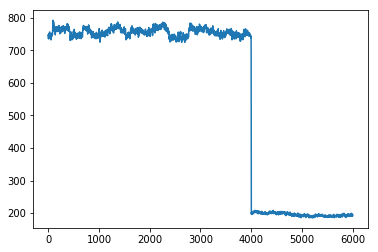

In [56]:
total_sasa = sasa.sum(axis=1)
print(total_sasa)
print(len(np.arange(0, 6003, 2)))
print(len(total_sasa))
plt.plot(np.arange(0, 6003, 2), total_sasa)

In [1]:
print(sasa[0])
print(len(sasa[0]))

NameError: name 'sasa' is not defined

## getting data from 3ns diffusion xvgs

In [20]:
def plotMSDs():
    plt.figure(figsize=(8,6))
    for i in range(1, 10):
        data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20_dif/SA20-0'+str(i)+'_3ns_msd.xvg', skip_header=20)
        plt.errorbar(data[:,0], data[:,1])
    for i in range(10, 21):
        data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20_dif/SA20-'+str(i)+'_3ns_msd.xvg', skip_header=20)
        plt.errorbar(data[:,0], data[:,1])
    plt.xlabel('Time (ps)')
    plt.ylabel('MSD (nmN/S$^2$)')

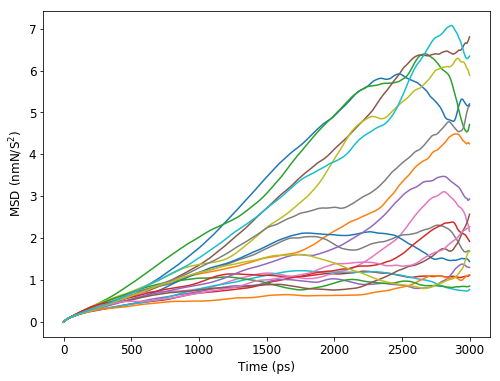

In [21]:
plotMSDs()

In [ ]:
def plotMSDs():
    plt.figure(figsize=(8,6))
    for i in range(1, 10):
        data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20_dif/SA20-0'+str(i)+'_3ns_msd.xvg', skip_header=20)
        plt.errorbar(data[:,0], data[:,1])
    for i in range(10, 21):
        data = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20_dif/SA20-'+str(i)+'_3ns_msd.xvg', skip_header=20)
        plt.errorbar(data[:,0], data[:,1])
    plt.xlabel('Time (ps)')
    plt.ylabel('MSD (nmN/S$^2$)')

In [78]:
palp = traj.top.select('resname STEP')
print(len(palp)/56)
#for residue in palp:
#    print residue.index

108


Text(0.5,0,u'Time (ns)')

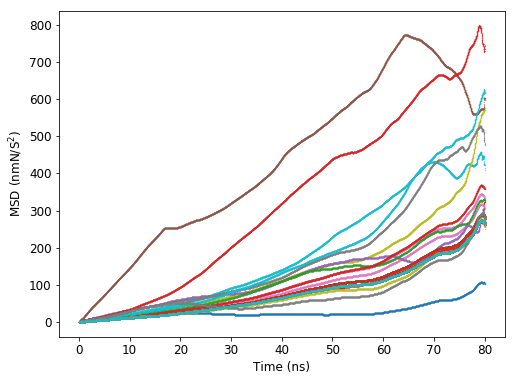

In [71]:
plt.figure(figsize=(8,6))
for i in range(1,145):
    q = np.genfromtxt('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/molecular_diffusion/msd'+str(i)+'.xvg', skip_header=20)
    plt.errorbar(q[:,0]/1000, q[:,1], marker='.', ms=.5, ls='none', c=)
plt.ylabel('MSD (nmN/S$^2$)')
plt.xlabel('Time (ns)')